# Text Vectorization

In [1]:
import re
import nltk
import numpy  as np
import pandas as pd

## What are Word Vectorization and Why It is so Important

Word vectorization generically refers to techniques used to convert text into numbers. There may be different numerical representations of the same text. 

Many Machine Learning algorithms and almost all Deep Learning Architectures are incapable of processing *strings* or *plain text* in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression, etc. in broad terms.


## Bag-of-Words (BOW)

As we have already said, in order to perform machine learning on text, we need to transform our documents into vector representations such that we can apply numeric machine learning. This process is called feature extraction or more simply, vectorization.

We will explore several choices, each of which extends or modifies the base bag-of-words model to describe semantic space. We will look at four types of vector encoding - frequency, one-hot, TF-IDF.

### Sample corpus of text documents

<table><tr>
<td> <img align="left" width="100" height="100" src="./img/text_analytics_with_python.jpg"/> </td>
<td> The following examples are taken from "Text Analytics with Python" by Dipanjan Sarkar (Apress, 2019).     </td>
</tr></table>

[Here](https://github.com/Apress/text-analytics-w-python-2e) you can find the original notebook used in the aforementioned textbook.

In [2]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, e...",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beaut...,weather
7,The dog is lazy but the brown fox is quick!,animals


### Simple text pre-processing

In [3]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

**Regular Expression Flags**

**re.I - 
re.IGNORECASE**

Perform case-insensitive matching; expressions like [A-Z] will also match lowercase letters. Full Unicode matching (such as Ü matching ü) also works unless the re.ASCII flag is used to disable non-ASCII matches. The current locale does not change the effect of this flag unless the re.LOCALE flag is also used. Corresponds to the inline flag (?i).

**re.A - 
re.ASCII**

Make \\w, \\W, \\b, \\B, \\d, \\D, \\s and \\S perform ASCII-only matching instead of full Unicode matching. This is only meaningful for Unicode patterns, and is ignored for byte patterns. Corresponds to the inline flag (?a).

In [4]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

<!--
![image.png](./img/3_1_text_vectorization_pic_0.png)
-->

### Frequency Vectors

The simplest vector encoding model is to simply fill in the vector with the frequency of each word as it appears in the document;
In this encoding scheme each document is represented as the multiset of the tokens that compose it and the value for each word position in the vectr is its count;
This representation can either be a straight count encoding or a normalized encoding where each word is weighted by the total number of words in the document.

In **Scikit-Learn** The CountVectorizer transformer from the sklearn.feature_extraction model has its own internal tokenization and normalization methods. The fit method of the vectorizer expects an iterable or list of strings or file objects, and creates a dictionary of the vocabulary on the corpus. When transform is called, each individual document is transformed into a sparse array whose index tuple is the row (the document ID) and the token ID from the dictionary, and whose value is the count.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [6]:
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)

In [7]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0



### One-Hot Encoding

Because they disregard grammar and the relative position of words in documents, frequency-based encoding methods suffer from the long tail, or Zipfian distribution, that characterizes natural language. As a result, tokens that occur very frequently are orders of magnitude more “significant” than other, less frequent ones. This can have a significant impact on some models (e.g., generalized linear models) that expect normally distributed features. 

A solution to this problem is **one-hot encoding**, a boolean vector encoding method that marks a particular vector index with a value of true (1) if the token exists in the document and false (0) if it does not. In other words, each element of a one-hot encoded vector reflects either the presence or absence of the token in the described text.

In [8]:
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1., binary=True)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [9]:
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)



**TF - Term Frequency**: Just counting the number of words in each document has 1 issue: it will give more weightage to longer documents than shorter documents. To avoid this, we can use frequency i.e. #count(word) / #Total words, in each document.


### Term Frequency-Inverse Document Frequency

The bag-of-words representations that we have explored so far only describe a document in a standalone fashion, not taking into account the context of the corpus. 
A better approach would be to consider the relative frequency or rareness of tokens in the document against their frequency in other documents. The central insight is that meaning is most likely encoded in the more rare terms from a document.

TF-IDF, term frequency-inverse document frequency, encoding normalizes the frequency of tokens in a document with respect to the rest of the corpus. 
This encoding approach accentuates terms that are very relevant to a specific instance, as shown in Figure, where the token studio has a higher relevance to this document since it only appears there.

The inverse document frequency is a measure of how much information the word provides, that is, whether the term is common or rare across all documents. 
It is the logarithmically scaled inverse fraction of the documents that contain the word, obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient: 

\begin{equation}idf(t,D) = \log \frac{N}{\vert \{  d \in D: t \in d\}\vert} \end{equation}  

where the numerator ($N$) is the total number of documents in the corpus and the denominator is the number of documents where the term $t$ appears.

Then tf-idf is calculated as: 

\begin{equation} tfidf(t,d,D) = tf(t,d) \cdot idf(t,D)\end{equation}

A high weight in tf-idf is reached by a high term frequency (in the given document) and a low document frequency of the term in the whole collection of documents; the weights hence tend to filter out common terms.  Since the ratio inside the idf's log function is always greater than or equal to 1, the value of idf (and tf-idf) is greater than or equal to 0. As a term appears in more documents, the ratio inside the logarithm approaches 1, bringing the idf and tf-idf closer to 0.

![image.png](./img/tf-idf-0.png)

A simple example might serve to explain the structure of the TDM more clearly. Assume we have a simple corpus consisting of two documents, Doc1 and Doc2, with the following content:

Doc1 = "I like databases"
Doc2 = "I dislike databases",

then the document-term matrix would be:

![image.png](./img/tf-idf-1.png)

Clearly there is nothing special about rows and columns – we could just as easily transpose them. If we did so, we’d get a term document matrix (TDM) in which the terms are rows and documents columns. One can work with either a DTM or TDM. Using the raw count of a term in a document, i.e. the number of times that term t occurs in document d, is the simplest choice to measure the term frequency $tf(t,d)$. If we denote the raw count by $f_{t,d}$, then the simplest $tf$ scheme is $tf(t,d) = f_{t,d}$. Other possibilities include

- Boolean "frequencies": $tf(t,d) = 1$ if $t$ occurs in $d$ and $0$ otherwise;
- Term frequency adjusted for document length : $f_{t,d} \big/ \text{(number of words in d)}$;
- Logarithmically scaled frequency: $tf(t,d) = \log (1 + f_{t,d})$;
- Augmented frequency, to prevent a bias towards longer documents, e.g. raw frequency divided by the raw frequency of the most occurring term in the document.

![image.png](./img/3_1_text_vectorization_pic_6.png)

Scikit-Learn provides a transformer called the TfidfVectorizer in the module called **feature_extraction.text** for vectorizing documents with TF–IDF scores. Under the hood, the TfidfVectorizer uses the CountVectorizer estimator we used to produce the bag-of-words encoding to count occurrences of tokens, followed by a TfidfTransformer, which normalizes these occurrence counts by the inverse document frequency. 

The input for a TfidfVectorizer is expected to be a sequence of filenames, file-like objects, or strings that contain a collection of raw documents, similar to that of the CountVectorizer. As a result, a default tokenization and preprocessing method is applied unless other functions are specified. The vectorizer returns a sparse matrix representation in the form of ((doc, term), tfidf) where each key is a document and term pair and the value is the TF–IDF score.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


### Extracting Features for New Documents

Suppose you built a machine learning model to classify and categorize news articles and it is currently in production. How you can generate features for completely new documents so that you can feed it into the machine learning models for prediction? The Scikit-Learn API provides the `transform` function for the vectorizers we discussed previously and we can leverage it to ge features for a completely new document that was not present in our corpus. For example:

In [12]:
new_doc = 'the sky is green today'

pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2), 
             columns=tv.get_feature_names())

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.63


## Document Similarity

When you have vectorized your text, we can try to define a distance metric such that documents that are closer together in feature space are more similar. There are a number of different measures that can be used to determine document similarity. Fundamentally, each relies on our ability to imagine documents as points in space, where the relative closeness of any two documents is a measure of their similarity.

We can measure vector similarity with cosine distance, using the cosine of the angle between the two vectors to assess the degree to which they share the same orientation. In effect, the more parallel any two vectors are, the more similar the documents will be (regardless of their magnitude).

<!--
<div>
<img src="./img/3_1_text_vectorization_pic_9.png" width="500"/>
</div>
-->
![pic](./img/3_1_text_vectorization_pic_9.png)

*(image source: Bengfort B. et al. "Text Analysis with Python")*

Mathematically, Cosine similarity metric measures the cosine of the angle between two n-dimensional vectors projected in a multi-dimensional space. The Cosine similarity of two documents will range from 0 to 1. If the Cosine similarity score is 1, it means two vectors have the same orientation. The value closer to 0 indicates that the two documents have less similarity.

The mathematical equation of Cosine similarity between two non-zero vectors is: 

\begin{equation} \text{similarity} = \cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\left\Vert\mathbf{A}\right\Vert \,\left\Vert\mathbf{B}\right\Vert} = \frac{\sum\limits_{i=1}^n A_iB_i}{\sqrt{\sum\limits_{i=1}^n A_i^2} \sqrt{ \sum\limits_{i=1}^n B_i^2}} \end{equation}

Let’s see an example of how to calculate the cosine similarity between two text document. The common way to compute the Cosine similarity is to first we need to count the word occurrence in each document. To count the word occurrence in each document, we can use **CountVectorizer** or **TfidfVectorizer** functions that are provided by Scikit-Learn library.

doc_1 = "Data is the oil of the digital economy" 
doc_2 = "Data is a new oil" 

and consider the following frequency matrix

<!--
<img src='./img/tf-idf-2.png'>
-->
![image.png](./img/tf-idf-2.png)

We can write

In [13]:
doc_1 = "Data is the oil of the digital economy" 
doc_2 = "Data is a new oil" 
data = [doc_1, doc_2]

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
vector_matrix = count_vectorizer.fit_transform(data)

Here, is the unique tokens list found in the data.

In [15]:
tokens = count_vectorizer.get_feature_names()
tokens

['data', 'digital', 'economy', 'is', 'new', 'of', 'oil', 'the']

In [16]:
vector_matrix.toarray()

array([[1, 1, 1, 1, 0, 1, 1, 2],
       [1, 0, 0, 1, 1, 0, 1, 0]], dtype=int64)

In [17]:
def create_dataframe(matrix, tokens):

    doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

create_dataframe(vector_matrix.toarray(),tokens)

,data,digital,economy,is,new,of,oil,the
doc_1,1,1,1,1,0,1,1,2
doc_2,1,0,0,1,1,0,1,0


In [18]:
a = vector_matrix.toarray()
v1 = np.array(a[0])
v2 = np.array(a[1])

In [19]:
n1 = np.linalg.norm(v1)
n2 = np.linalg.norm(v2)
prod = np.inner(v1,v2)

In [20]:
print(prod/(n1*n2))

0.4743416490252569


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['doc_1','doc_2'])

,doc_1,doc_2
doc_1,1.000000,0.474342
doc_2,0.474342,1.000000


Let’s check the cosine similarity with `TfidfVectorizer`, and see how it change over `CountVectorizer`.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,data,digital,economy,is,new,of,oil,the
doc_1,0.243777,0.34262,0.34262,0.243777,0.000000,0.34262,0.243777,0.68524
doc_2,0.448321,0.00000,0.00000,0.448321,0.630099,0.00000,0.448321,0.00000


In [23]:
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['doc_1','doc_2'])

,doc_1,doc_2
doc_1,1.000000,0.327871
doc_2,0.327871,1.000000


Here, using `TfidfVectorizer` we get the cosine similarity between doc_1 and doc_2 is 0.32.  Where the `CountVectorizer` has returned the cosine similarity of doc_1 and doc_2 is 0.47. This is because `TfidfVectorizer` penalized the most frequent words in the document such as stopwords.

Now, the **distance** can be defined as 

\begin{equation}
d =1-\mathrm{CosineSimilarity} 
\end{equation}

The intuition behind this is that if 2 vectors are perfectly the same then similarity is 1 (angle=0) and thus, distance is 0 (1-1=0).


Let's apply the same analysis to our toy corpus:

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


**Clustering documents using similarity features**

If you want a very nice introduction to hierarchical clustering see [this](https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8) post. In the beginning of the agglomerative clustering process, each element is in a cluster of its own. The clusters are then sequentially combined into larger clusters, until all elements end up being in the same cluster. At each step, the two clusters separated by the shortest distance are combined. The function used to determine the distance between two clusters, known as the linkage function, is what differentiates the agglomerative clustering methods. In our case we use as linkage the similarity_matrix.

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


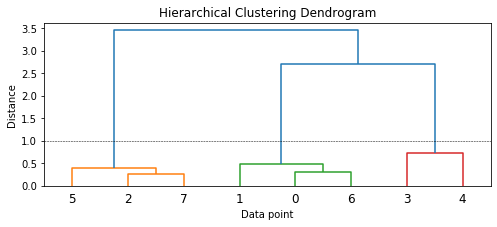

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [27]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, e...",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beaut...,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## Word Embedding

Humans have always excelled at understanding languages. It is easy for humans to understand the relationship between words but for computers, this task may not be simple. Word embeddings are basically a form of word representation that bridges the human understanding of language to that of a machine. For example, we humans understand the words like king and queen, man and woman, tiger and tigress have a certain type of relation between them but how can a computer figure this out?

The different encoding we have discussed so far is arbitrary as it does not capture any relationship between words. 
It can be challenging for a model to interpret, for example, a linear classifier learns a single weight for each feature. 
Because there is no relationship between the similarity of any two words and the similarity of their encodings, this feature-weight combination is not meaningful.

It should be nice to have representations of text in an n-dimensional space where words that have the same meaning have a similar representation. Meaning that two similar words are represented by almost similar vectors that are very closely placed in a vector space. 

Thus when using word embeddings, all individual words are represented as real-valued vectors in a predefined vector space. 
Each word is mapped to one vector and the vector values are learned in a way that resembles a neural network. Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Tomas Mikolov in 2013 at Google.

The concept of embeddings arises from a branch of Natural Language Processing called - “Distributional Semantics”. It is based on the simple intuition that: ***Words that occur in similar contexts tend to have similar meanings***. In other words, a word’s meaning is given by the words that it appears frequently with.

## Word2Vec

Word2vec is a method to efficiently create word embeddings by using a two-layer neural network.  It was developed by Tomas Mikolov, et al. at Google in 2013 as a response to make the neural-network-based training of the embedding more efficient and since then has become the de facto standard for developing pre-trained word embedding. 

The input of word2vec is a text corpus and its output is a set of vectors known as feature vectors that represent words in that corpus. The Word2Vec objective function causes the words that have a similar context to have similar embeddings. 
Thus in this vector space, these words are really close. Mathematically, the cosine of the angle (Q) between such vectors should be close to 1, i.e. angle close to 0.

Word2vec is not a single algorithm but a combination of two techniques - **CBOW(Continuous bag of words)** and **Skip-gram** model. Both these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both these techniques learn weights which act as word vector representations. 



### CBOW Architecture 

CBOW predicts the probability of a word to occur **given the words surrounding it**. We can consider a single word or a group of words. But for simplicity, we will take a single context word and try to predict a single target word.
The English language contains almost 1.2 million words, making it impossible to include so many words in our example. So we will consider a small example in which we have only four words i.e. ***live***, ***home***, ***they*** and ***at***. For simplicity, we will consider that the corpus contains only one sentence, that being, ***They live at home***. First, we convert each word into a one-hot encoding form. Also, we'll not consider all the words in the sentence but ll only take certain words that are in a window.

![image.png](./img/word-embedding-1.png)

For example for a window size equal to three, we only consider three words
in a sentence. The middle word is to be predicted and the surrounding two
words are fed into the neural network as context. The window is then slid
and the process is repeated again. Finally, after training the network repeatedly by sliding the window a
shown above, we get weights which we use to get the embeddings as
shown below. Usually, we take a window size of around 8-10 words and have a
vector size of 300.

![image.png](./img/word-embedding-2.png)

### Skip-gram model

The Skip-gram model architecture usually tries to achieve the reverse of what the CBOW model does. It tries to predict the source context words (surrounding words) given a target word (the centre word)

The working of the skip-gram model is quite similar to the CBOW but there is just a difference in the architecture of its neural network and the way the weight matrix is generated  as shown in the figure below:

![image.png](./img/3_1_text_vectorization_pic_16.png)

So now which one of the two algorithms should we use for implementing word2vec? Turns out for large corpus with higher dimensions, it is better to use skip-gram but is slow to train. Whereas CBOW is better for small corpus and is faster to train too.

## Implementing a word2vec model using a CBOW NN architecture

### Load up sample corpus

In [28]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [29]:
from nltk.corpus import gutenberg
book = gutenberg.sents('carroll-alice.txt') 

In [30]:
from string import punctuation

remove_terms = punctuation + '0123456789'

norm_book = [[word.lower() for word in sent if word not in remove_terms] for sent in book]
norm_book = [' '.join(tok_sent) for tok_sent in norm_book]
norm_book = filter(None, normalize_corpus(norm_book))
norm_book = [tok_sent for tok_sent in norm_book if len(tok_sent.split()) > 2]

print('Total lines:', len(book))
print('\nSample line:', book[10])
print('\nProcessed line:', norm_book[10])

Total lines: 1703

Sample line: ['The', 'rabbit', '-', 'hole', 'went', 'straight', 'on', 'like', 'a', 'tunnel', 'for', 'some', 'way', ',', 'and', 'then', 'dipped', 'suddenly', 'down', ',', 'so', 'suddenly', 'that', 'Alice', 'had', 'not', 'a', 'moment', 'to', 'think', 'about', 'stopping', 'herself', 'before', 'she', 'found', 'herself', 'falling', 'down', 'a', 'very', 'deep', 'well', '.']

Processed line: thought alice fall shall think nothing tumbling stairs


### Build Vocabulary

In [31]:
from keras.preprocessing import text
from keras.preprocessing import sequence
from keras.utils         import np_utils

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_book)
word2id = tokenizer.word_index

In [32]:
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_book]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 2379
Vocabulary Sample: [('said', 1), ('alice', 2), ('little', 3), ('one', 4), ('would', 5), ('know', 6), ('went', 7), ('like', 8), ('could', 9), ('time', 10)]


### Build (context_words, target_word) pair generator

In [33]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [35]:
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['alice', 'adventures', 'lewis', 'carroll'] -> Target (Y): wonderland
Context (X): ['alice', 'beginning', 'tired', 'sitting'] -> Target (Y): get
Context (X): ['beginning', 'get', 'sitting', 'sister'] -> Target (Y): tired
Context (X): ['get', 'tired', 'sister', 'bank'] -> Target (Y): sitting
Context (X): ['tired', 'sitting', 'bank', 'nothing'] -> Target (Y): sister
Context (X): ['sitting', 'sister', 'nothing', 'twice'] -> Target (Y): bank
Context (X): ['sister', 'bank', 'twice', 'peeped'] -> Target (Y): nothing
Context (X): ['bank', 'nothing', 'peeped', 'book'] -> Target (Y): twice
Context (X): ['nothing', 'twice', 'book', 'sister'] -> Target (Y): peeped
Context (X): ['twice', 'peeped', 'sister', 'reading'] -> Target (Y): book
Context (X): ['peeped', 'book', 'reading', 'pictures'] -> Target (Y): sister


### Build CBOW Deep Network Model

In [36]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))

cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
print(cbow.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            237900    
_________________________________________________________________
lambda (Lambda)              (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 2379)              240279    
Total params: 478,179
Trainable params: 478,179
Non-trainable params: 0
_________________________________________________________________
None


### Train model for 5 epochs

In [37]:
for epoch in range(1, 10):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 10000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Processed 10000 (context, word) pairs
Epoch: 1 	Loss: 82861.53140425682

Processed 10000 (context, word) pairs
Epoch: 2 	Loss: 85602.46584838629

Processed 10000 (context, word) pairs
Epoch: 3 	Loss: 97885.54514807463

Processed 10000 (context, word) pairs
Epoch: 4 	Loss: 101883.65546479821

Processed 10000 (context, word) pairs
Epoch: 5 	Loss: 102871.60655751824

Processed 10000 (context, word) pairs
Epoch: 6 	Loss: 102841.33749639988

Processed 10000 (context, word) pairs
Epoch: 7 	Loss: 101846.42558838427

Processed 10000 (context, word) pairs
Epoch: 8 	Loss: 101338.09550878406

Processed 10000 (context, word) pairs
Epoch: 9 	Loss: 100069.8285932988



### Get word embeddings

In [38]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(2378, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
alice,0.110740,-0.206482,-0.095507,0.125904,-0.029820,-1.373520,-0.533391,0.057471,-0.231086,-0.001672,...,-0.338460,0.120766,0.133433,0.026742,-0.166425,-0.121798,0.218291,0.033906,-0.325388,-0.006172
little,-0.111091,-0.026161,0.157881,0.021539,-0.588673,-0.183460,0.053935,-0.055449,0.145096,-0.075216,...,-0.166039,0.164547,-0.290646,0.612585,-0.194902,-0.252110,0.416965,-0.039088,0.186179,0.207721
one,0.092267,0.243680,0.273080,-0.004214,-0.253085,-0.229521,0.300807,0.559803,0.446665,0.045866,...,-0.224569,0.327376,-0.244948,0.063515,-0.054172,0.128954,0.281234,-0.110221,-0.018703,0.033904
would,-0.016690,0.219785,-0.117265,0.164920,0.142406,-0.069837,-0.463099,-0.174782,0.003315,0.014213,...,-0.137855,0.098561,0.117097,-0.186808,-0.165801,0.095544,0.120867,-0.008317,0.060949,-0.023347
know,0.093930,-0.368835,0.164864,-0.094852,-0.297923,-0.152862,-0.170664,0.263197,0.260616,0.122768,...,-0.497493,0.057678,-0.190825,-0.027801,-0.130807,0.189335,0.051051,-0.453787,0.199254,-0.255743


### Build a distance matrix to view the most similar words (contextually)

In [47]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['cat', 'caterpillar', 'hatter', 'queen']}

similar_words

(2378, 2378)


{'cat': ['cheshire', 'mad', 'raving', 'conversation', 'live'],
 'caterpillar': ['eggs', 'pigeon', 'mushroom', 'hookah', 'held'],
 'hatter': ['bread', 'butter', 'teacup', 'jurors', 'officers'],
 'queen': ['three', 'hedgehog', 'arm', 'spoke', 'makes']}

## GloVe

As we have said, word vectors techniques put words to a vector space, where similar words cluster together and different words repel. The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors. In general there is quite a bit of synergy between the GloVe and Word2vec.

#### Co-Occurence Matrix

Generally speaking, a co-occurrence matrix will have specific entities in rows (ER) and columns (EC). The purpose of this matrix is to present the number of times each ER appears in the same context as each EC. As a consequence, in order to use a co-occurrence matrix, you have to define your entites and the context in which they co-occur. In NLP, the most classic approach is to define each entity (ie, lines and columns) as a word present in a text, and the context as a sentence or in the $\pm n$ word window - depends on the application.

Similar words tend to occur together and will have a similar context for example : Apple is a fruit. Mango is a fruit.
Apple and mango tend to have a similar context i.e fruit. Co-occurrence : For a given corpus, the co-occurrence of a pair of words say w1 and w2 is the number of times they have appeared together in a Context Window. Context Window : Context window is specified by a number and the direction.

The matrix A stores co-occurrences of words. In this method, we count the number of times each word appears inside a window of a particular size around the word of interest. Calculate this count for all the words in the corpus. Let us understand all of this with the help of an example.

Let our corpus contain the following three sentences:

- I enjoy flying
- I like NLP
- I like deep learning

Let ***window size = 1***. This means that context words for each and every word are ***1 word to the left and one to the right***.

Context words for:

- I = enjoy(1 time), like(2 times)
- enjoy = I (1 time), flying(2 times)
- flying = enjoy(1 time)
- like = I(2 times), NLP(1 time), deep(1 time)
- NLP = like(1 time)
- deep = like(1 time), learning(1 time)
- learning = deep(1 time)

Therefore, the resultant co-occurrence matrix A with fixed window size 1 looks like:

![image.png](./img/3_1_text_vectorization_pic_17.png)

So, from a formal point of view, given a corpus having $V$ words, the co-occurrence matrix $X$ will be a $V  \times V$ matrix, where the $i$-th row and $j$-th column of $X$,$X_{ij}$ denotes how many times word $i$ has co-occurred with word $j$

The number of “contexts” is, of course, large, since it is essentially combinatorial in size. So then we factorize this matrix to yield a lower-dimensional matrix, where each row now yields a vector representation for each word. In general, this is done by minimizing a “reconstruction loss”. This loss tries to find the lower-dimensional representations which can explain most of the variance in the high-dimensional data.

From the matrix elements we can define the quantity $P_{ik}$ as the probability of seeing word $i$ and $k$ together, this is computed by dividing the number of times $i$ and $k$ appeared together ($X_{ik}$) by the total number of times word $i$ appeared in the corpus ($X_i$). Consider now the ratio \begin{equation} \frac{P_{ik}}{P_{jk}} \end{equation} where $k$ is another word in the text. For example, let's take a situation reported in the original article regarding words like *water*, *steam* and *ice* together with *solid* and *liquid* ...


![image.png](./img/3_1_text_vectorization_pic_19.png)

You can see that given two words, i.e. ice and steam, if the third word $k$ (also called the *probe word*):

- is very similar to ice but irrelevant to steam (e.g. k=solid), $P_{ik}/P_{jk}$ will be **very high (> 1)**,
- is very similar to steam but irrelevant to ice (e.g. k=gas), $P_{ik}/P_{jk}$ will be **very small (< 1)**;
- is related or unrelated to either words, then $P_{ik}/P_{jk}$ **will be close to 1**.

So, if we can find a way to incorporate $P_{ik}/P_{jk}$ to computing word vectors we will be achieving the goal of using global statistics when learning word vectors.

Assume that there is a function $F$ which takes in word vectors of $i,j$ and $k$ which outputs the ratio we are interested in: 

\begin{equation}F(w_i,w_j, u_k) = \frac{P_{ik}}{P_{jk}} \end{equation}

Word vectors are linear systems. For example, you should perform arithmetic in embedding space, e.g.: 

\begin{equation} \mathbf{w_{king} - w_{male} + w_{female} = w_{queen}}\end{equation}

Therefore, let us change the above equation to the following: 

\begin{equation} F(w_i - w_j, u_k) = \frac{P_{ik}}{P_{jk}} \end{equation}

**Vector to a scalar**

How do we make LHS a scalar? There is a pretty straight forward answer to this. That is to introduce a transpose and a dot product between the two entities the following way: 

\begin{equation} F((w_i - w_j)^T \cdot u_k) = P_{ik}/P_{jk} \end{equation}

If you assume a word vector as a $D\times 1$ matrix, $(w_i - w_j)^T$ will be $1\times D$ shaped which gives a scalar when multiplied with $u_k$.


**Finding the final equation**

Next, if we assume $F$ has a certain property (i.e. homomorphism between additive group and the multiplicative group) which gives,

$$F(w_i^T u_k-w_j^T u_k) = \frac{F(w_i^T u_k)}{F(w_j^T u_k)} = \frac{P_{ik}}{P_{jk}}$$

In other words this particular homomorphism ensures that the subtraction $F(A-B)$ can also be represented as a division $F(A)/F(B)$ and get the same result. 

Note that for word-word co-occurrence matrices, the distinction between a word and a context word is arbitrary and that we are free to exchange the two roles. To do so consistently we must not only exchange $w \leftrightarrow u$ but also $X \leftrightarrow X^T$. Our final model is invariant under this relabeling, this is another reason for the particular choice of the homomorphism.

And therefore,

$$\frac{F(w_i^T u_k)}{F(w_j^T u_k)} = \frac{P_{ik}}{P_{jk}} \Rightarrow F(w_i^T u_k) = P_{ik}$$

If we assume F=exp the above homomorphism property is satisfied. Then let us set,

$$\exp(w_i^T u_k) = P_{ik}= \frac{X_{ik}}{X_i}$$

and

$$w_i^T u_k = log(X_{ik})-log(X_i)$$

Next we note that this equation would exhibit the exchange symmetry if not for the $log(X_i)$ on the right hand side. However this term is independent on $k$ so it can be absorbed into a bias $b_i$ for $w_i$. Finally adding and addictional bias $b_k$ for $u_k$ restores the symmetry,

$$w_i^T u_k + b_i + b_k = log(X_{ik})$$

**Defining a cost**

In an ideal setting, where you have perfect word vectors, the above expression will be zero. In other words, that’s our goal or objective. So we will be setting the LHS expression as our cost function.

$$J(w_i, w_j)= (w_i^T u_j + b_i +b_j — log(X_{ij}))^2$$

Note that the square makes this a mean square cost function. But unfortunately our work does not stop here, we still have to patch up an important theoretical problem. Ponder what would happen if $X_{ik} = 0$. If you kick off a little experiment with the above cost function we'll have a problem because $log(0)$ is undefined. The easy fix would be to use $log(1+X_{ik})$ known as Laplacian smoothing. But the authors behind the GloVe paper propose a new way of doing this. That is to introduce a weighting function.

$$J = f(X_{ij}) \left( w_i^T u_j + b_i +b_j — log(X_{ij})\right)^2$$

where 

$$f(X_{ij}) = (x/x_{max})^\alpha \quad \text{if} \, x < x_{max} \quad \text{else} \, 0$$

(in the original paper you can find some considerations about the value of tha $\alpha$ parameter).

## Pre-Trained Embedding Models

In practice, we use both GloVe and Word2Vec to convert our text into embeddings and both exhibit comparable performances. 
Although in real applications we train our model over Wikipedia text with a window size around 5- 10. 
The number of words in the corpus is around 13 million, hence it takes a huge amount of time and resources to generate these embeddings. 
To avoid this we can use the pre-trained word vectors that are already trained and we can easily use them. 
Here are the links to download pre-trained Word2Vec or GloVe.

# References and Credits

***Bird S. et al.***, "*Natural Language Processing with Python*" O'Reilly (2009)

***Bengfort B. et al.***, "*Applied Text Analysis with Python*" O'Reilly (2018)

***Sarkar D.***, "*Text Analytics with Python A Practitioner's Guide to Natural Language Processing 2nd Ed*" APress (2019)

***Pennington J. et al.***, "*GloVe: Global Vectors for Word Representation*", [pdf](https://nlp.stanford.edu/pubs/glove.pdf)

***Mikolov T. et al.***, "*Efficient Estimation of Word Representations in Vector Space*", arXiv:1301.3781v3  7 Sep 2013 [pdf](https://arxiv.org/abs/1301.3781)